In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [55]:
loan_dataset=pd.read_csv("dataset.csv")

In [56]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [57]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [58]:
loan_dataset.shape

(614, 13)

In [59]:
loan_dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [60]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
loan_dataset=loan_dataset.dropna()

In [62]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [64]:
loan_dataset.shape

(480, 13)

In [65]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [66]:
loan_dataset["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [67]:
loan_dataset.replace(to_replace="3+",value=4,inplace=True)

In [68]:
loan_dataset["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [69]:
#Data Visualization

In [70]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = loan_dataset)

<Axes: xlabel='Education', ylabel='count'>

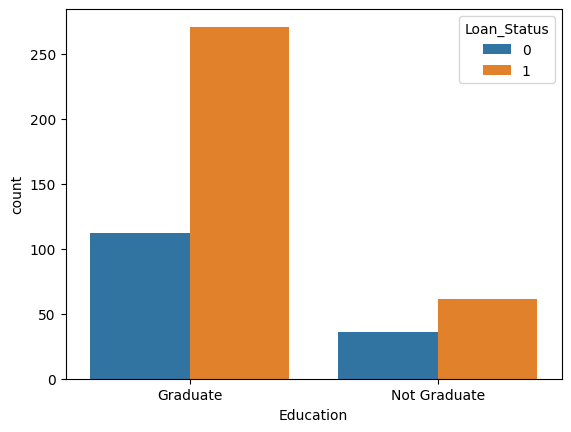

In [71]:
sns.countplot(x="Education",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

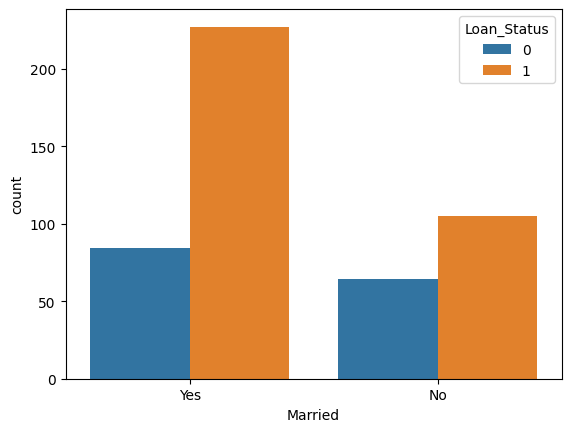

In [72]:
sns.countplot(x="Married",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

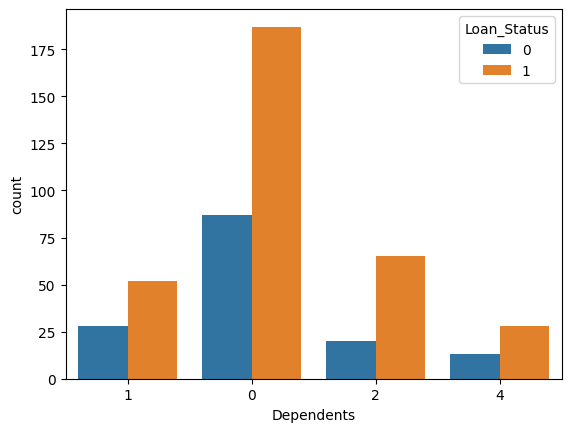

In [73]:
sns.countplot(x="Dependents",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Credit_History', ylabel='count'>

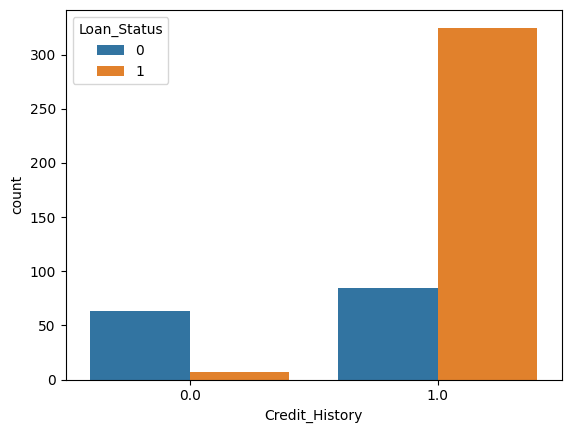

In [74]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

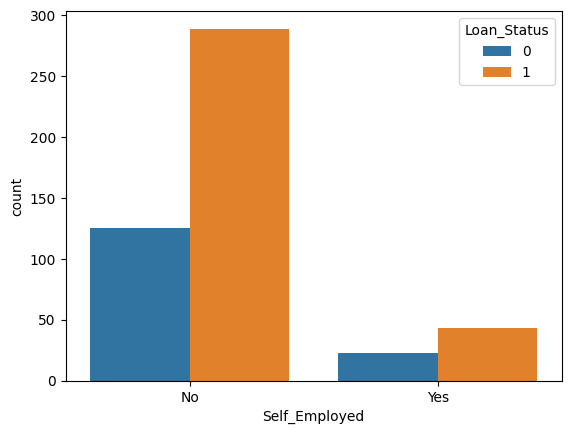

In [75]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='ApplicantIncome', ylabel='Percent'>

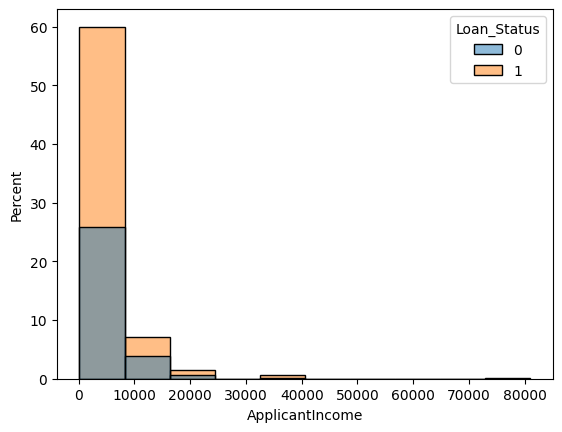

In [76]:
sns.histplot(x="ApplicantIncome", data=loan_dataset,stat='percent',bins=10,hue="Loan_Status")

In [77]:
sns.kdeplot(data=loan_dataset, x="ApplicantIncome")

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

<Axes: xlabel='Property_Area', ylabel='count'>

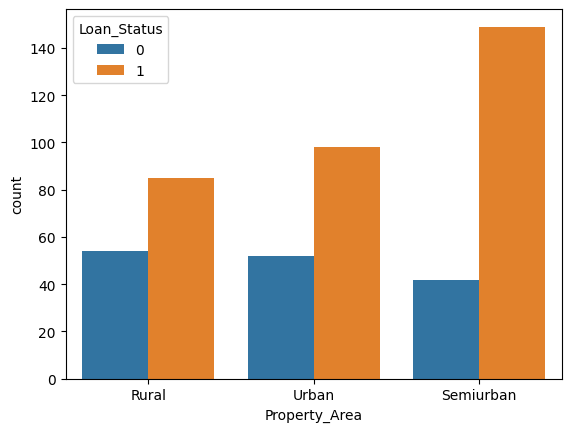

In [78]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=loan_dataset)

In [79]:
sns.kdeplot(data=loan_dataset, x="ApplicantIncome",hue="Loan_Status")

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

<Axes: xlabel='LoanAmount', ylabel='Density'>

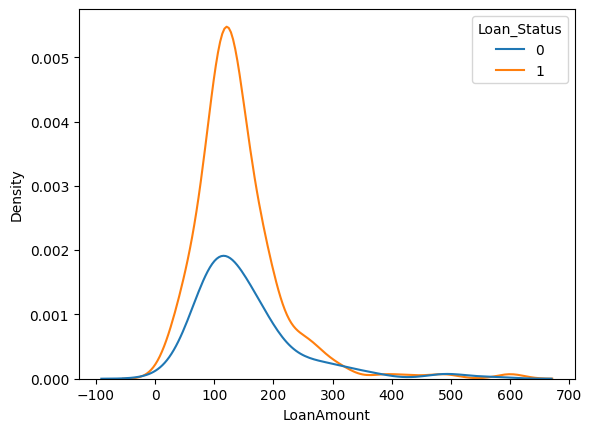

In [80]:
sns.kdeplot(data=loan_dataset, x="LoanAmount",hue="Loan_Status")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

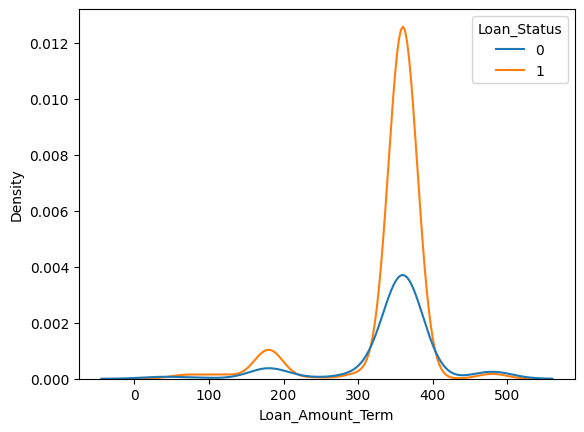

In [81]:
sns.kdeplot(data=loan_dataset, x="Loan_Amount_Term",hue="Loan_Status")

In [82]:
sns.histplot(x="LoanAmount", data=loan_dataset,stat='percent',bins=10,hue="Loan_Status")

<Axes: xlabel='LoanAmount', ylabel='Percent'>

<Axes: xlabel='Loan_Amount_Term', ylabel='Percent'>

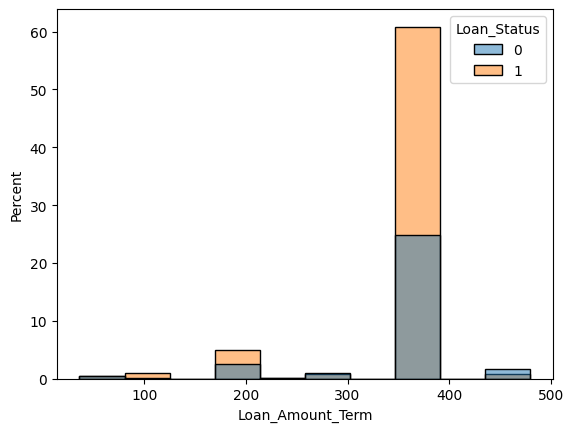

In [83]:
sns.histplot(x="Loan_Amount_Term", data=loan_dataset,stat='percent',bins=10,hue="Loan_Status")

In [84]:
loan_dataset_copy=loan_dataset
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [116]:

string_cols = loan_dataset_copy.select_dtypes(include=['object']).columns

# Drop string columns
df_no_strings = loan_dataset_copy.drop(columns=string_cols)
corr=df_no_strings.corr()
corr
#sns.heatmap(corr)

Gender   Married  Education  Self_Employed  \
Gender             1.000000  0.349424  -0.059245      -0.002761   
Married            0.349424  1.000000  -0.001652       0.015674   
Education         -0.059245 -0.001652   1.000000       0.005085   
Self_Employed     -0.002761  0.015674   0.005085       1.000000   
ApplicantIncome    0.032644  0.036717   0.131172       0.170785   
CoapplicantIncome  0.156171  0.102950   0.074499      -0.001509   
LoanAmount         0.098975  0.183442   0.172780       0.120389   
Loan_Amount_Term  -0.088704 -0.107504   0.102168      -0.034852   
Credit_History     0.022447  0.029095   0.056656      -0.023568   
Property_Area     -0.000204  0.038653   0.055005      -0.050797   
Loan_Status        0.064504  0.112321   0.068437      -0.034715   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.032644           0.156171    0.098975   
Married                   0.036717           0.102950    0.183442   
Education                 0.131172           0.074499    0.172780   
Self_Employed             0.170785          -0.001509    0.120389   
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
Property_Area            -0.053160           0.006540   -0.109685   
Loan_Status              -0.043152          -0.049020   -0.071753   

                   Loan_Amount_Term  Credit_History  Property_Area  \
Gender                    -0.088704        0.022447      -0.000204   
Married                   -0.107504        0.029095       0.038653   
Education                  0.102168        0.056656       0.055005   
Self_Employed             -0.034852       -0.023568      -0.050797   
ApplicantIncome           -0.010838       -0.056152      -0.053160   
CoapplicantIncome         -0.005775       -0.008692       0.006540   
LoanAmount                 0.050867       -0.040773      -0.109685   
Loan_Amount_Term           1.000000        0.032937      -0.058656   
Credit_History             0.032937        1.000000      -0.003013   
Property_Area             -0.058656       -0.003013       1.000000   
Loan_Status               -0.007798        0.529390       0.031361   

                   Loan_Status  
Gender                0.064504  
Married               0.112321  
Education             0.068437  
Self_Employed        -0.034715  
ApplicantIncome      -0.043152  
CoapplicantIncome    -0.049020  
LoanAmount           -0.071753  
Loan_Amount_Term     -0.007798  
Credit_History        0.529390  
Property_Area         0.031361  
Loan_Status           1.000000

In [138]:
#sns.histplot(np.log(loan_dataset["ApplicantIncome"])+1)

In [127]:
loan_dataset["Log_ApplicantIncome"]=np.log(loan_dataset["ApplicantIncome"])+1

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

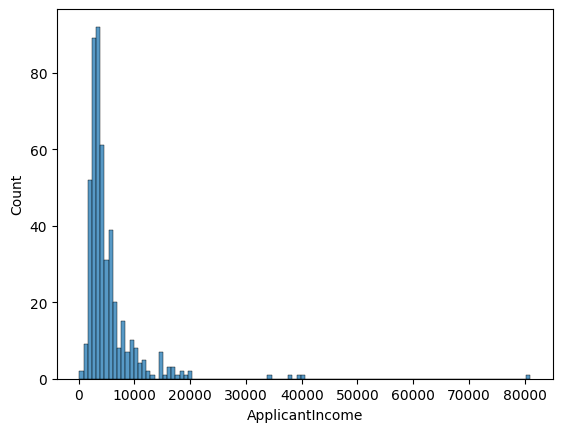

In [132]:
sns.histplot(loan_dataset["ApplicantIncome"])

In [131]:
sns.histplot(loan_dataset["Log_ApplicantIncome"])

<Axes: xlabel='Log_ApplicantIncome', ylabel='Count'>

In [123]:
sns.histplot(loan_dataset["CoapplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

In [124]:
sns.histplot(loan_dataset["LoanAmount"])

<Axes: xlabel='LoanAmount', ylabel='Count'>

In [128]:
loan_dataset["Total_Applicant_Income"]=loan_dataset["ApplicantIncome"]+loan_dataset["CoapplicantIncome"]

<Axes: xlabel='Total_Applicant_Income', ylabel='Count'>

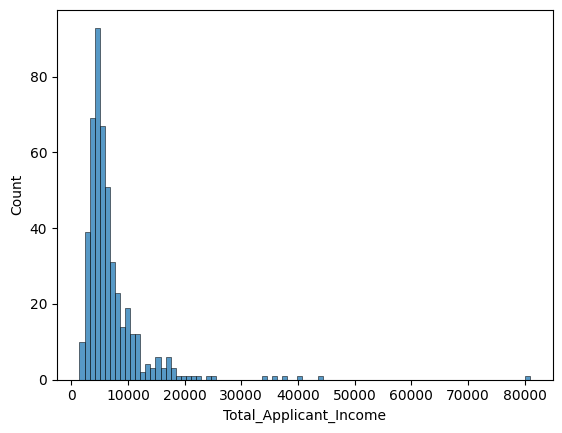

In [133]:
sns.histplot(loan_dataset["Total_Applicant_Income"])

In [134]:
loan_dataset["Log_Total_ApplicantIncome"]=np.log(loan_dataset["Total_Applicant_Income"])+1

In [135]:
sns.histplot(loan_dataset["Log_Total_ApplicantIncome"])

<Axes: xlabel='Log_Total_ApplicantIncome', ylabel='Count'>

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

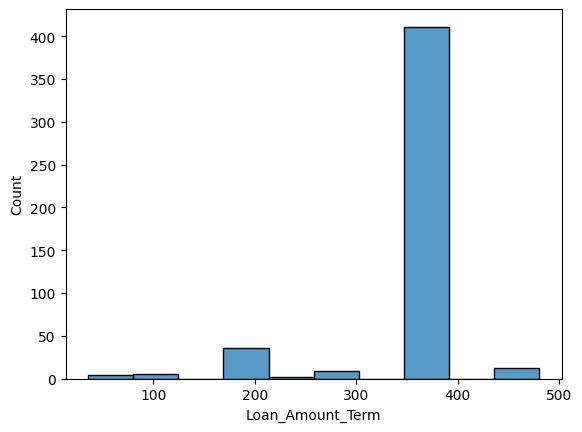

In [125]:
sns.histplot(loan_dataset["Loan_Amount_Term"])

In [126]:
sns.histplot(loan_dataset["Property_Area"])

<Axes: xlabel='Property_Area', ylabel='Count'>

In [139]:
#drop unnecessary columns
cols=["ApplicantIncome","CoapplicantIncome","Total_Applicant_Income","Loan_Amount_Term"]
loan_dataset=loan_dataset.drop(columns=cols,axis=1)
loan_dataset.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  LoanAmount  \
1  LP001003       1        1          1          1              0       128.0   
2  LP001005       1        1          0          1              1        66.0   
3  LP001006       1        1          0          0              0       120.0   
4  LP001008       1        0          0          1              0       141.0   
5  LP001011       1        1          2          1              1       267.0   

   Credit_History  Property_Area  Loan_Status  Log_ApplicantIncome  \
1             1.0              0            0             9.430109   
2             1.0              2            1             9.006368   
3             1.0              2            1             8.856707   
4             1.0              2            1             9.699515   
5             1.0              2            1             9.597297   

   Log_Total_ApplicantIncome  
1                   9.714568  
2                   9.006368  
3                   9.505323  
4                   9.699515  
5                  10.170872

In [140]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [141]:
X

Gender  Married Dependents  Education  Self_Employed  LoanAmount  \
1         1        1          1          1              0       128.0   
2         1        1          0          1              1        66.0   
3         1        1          0          0              0       120.0   
4         1        0          0          1              0       141.0   
5         1        1          2          1              1       267.0   
..      ...      ...        ...        ...            ...         ...   
609       0        0          0          1              0        71.0   
610       1        1          4          1              0        40.0   
611       1        1          1          1              0       253.0   
612       1        1          2          1              0       187.0   
613       0        0          0          1              1       133.0   

     Credit_History  Property_Area  Log_ApplicantIncome  \
1               1.0              0             9.430109   
2               1.0              2             9.006368   
3               1.0              2             8.856707   
4               1.0              2             9.699515   
5               1.0              2             9.597297   
..              ...            ...                  ...   
609             1.0              0             8.972466   
610             1.0              0             9.320205   
611             1.0              2             9.996157   
612             1.0              2             9.933664   
613             0.0              1             9.430109   

     Log_Total_ApplicantIncome  
1                     9.714568  
2                     9.006368  
3                     9.505323  
4                     9.699515  
5                    10.170872  
..                         ...  
609                   8.972466  
610                   9.320205  
611                  10.025456  
612                   9.933664  
613                   9.430109  

[480 rows x 10 columns]

In [87]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [142]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=42)

In [143]:
print(X.shape, X_train.shape, X_test.shape)

(480, 10) (432, 10) (48, 10)


In [144]:
#SVM Model
classifier = svm.SVC(kernel='linear')

In [145]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [146]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8101851851851852


In [147]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7916666666666666


In [94]:
#Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
clf.fit(X_train, Y_train)
# accuracy score on training data
X_train_prediction = clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
# accuracy score on training data
X_test_prediction = clf.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on training data :  0.8148148148148148
Accuracy on test data :  0.75


In [149]:
m=list(range(1,50,1))
training_data_accuray=[]
test_data_accuray=[]
for i in m:
    # Create a Random Forest Classifier object
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    # Train the model
    clf.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = clf.predict(X_train)
    training_data_accuray.append(accuracy_score(X_train_prediction,Y_train))
    #print('Accuracy on training data : ', training_data_accuray)
    # accuracy score on training data
    X_test_prediction = clf.predict(X_test)
    test_data_accuray.append(accuracy_score(X_test_prediction,Y_test))
    #print('Accuracy on test data : ', test_data_accuray)
#print('Accuracy on training data : ', training_data_accuray)
#print('Accuracy on test data : ', test_data_accuray)
# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first variable
sns.lineplot(x=m, y=training_data_accuray, ax=ax1, color='blue', label='Accuracy on training data')

# Create a second y-axis
ax2 = ax1.twinx() 

# Plot the second variable on the second y-axis
sns.lineplot(x=m, y=test_data_accuray, ax=ax2, color='red', label='Accuracy on test data ')

# Customize the plot
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy on training data', color='blue')
ax2.set_ylabel('Accuracy on test data', color='red')
plt.title('Accuracy Vs max_depth')
plt.legend()
plt.show()

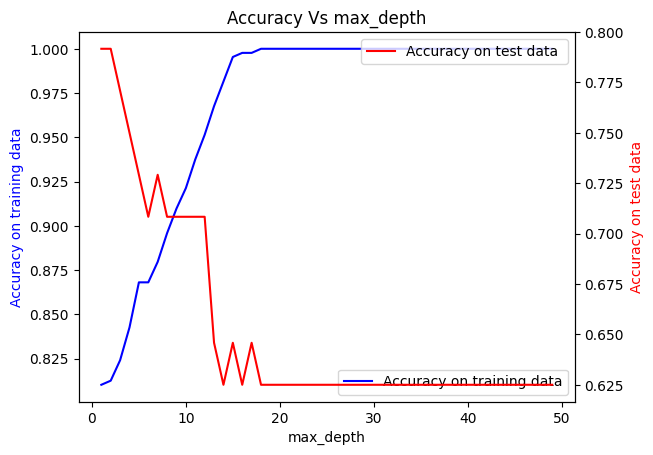

In [97]:
m=list(range(1,50,1))
training_data_accuray=[]
test_data_accuray=[]
for i in m:
    # Create a Random Forest Classifier object
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=42)
    # Train the model
    clf.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = clf.predict(X_train)
    training_data_accuray.append(accuracy_score(X_train_prediction,Y_train))
    #print('Accuracy on training data : ', training_data_accuray)
    # accuracy score on training data
    X_test_prediction = clf.predict(X_test)
    test_data_accuray.append(accuracy_score(X_test_prediction,Y_test))
    #print('Accuracy on test data : ', test_data_accuray)
#print('Accuracy on training data : ', training_data_accuray)
#print('Accuracy on test data : ', test_data_accuray)
# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first variable
sns.lineplot(x=m, y=training_data_accuray, ax=ax1, color='blue', label='Accuracy on training data')

# Create a second y-axis
ax2 = ax1.twinx() 

# Plot the second variable on the second y-axis
sns.lineplot(x=m, y=test_data_accuray, ax=ax2, color='red', label='Accuracy on test data ')

# Customize the plot
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy on training data', color='blue')
ax2.set_ylabel('Accuracy on test data', color='red')
plt.title('Accuracy Vs max_depth')
plt.legend()
plt.show()

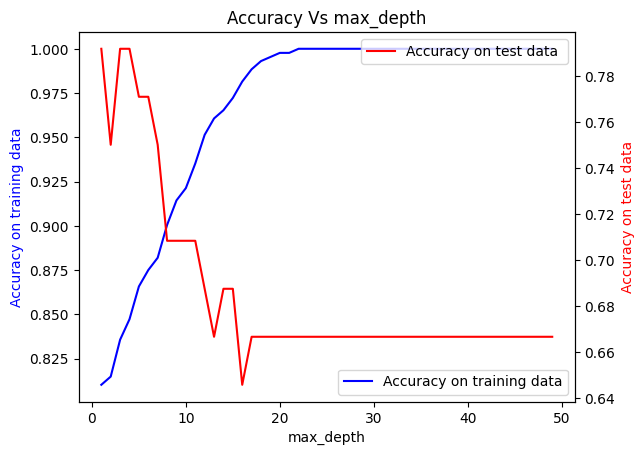

In [150]:
m=list(range(1,50,1))
training_data_accuray=[]
test_data_accuray=[]
for i in m:
    # Create a Random Forest Classifier object
    clf = DecisionTreeClassifier(criterion='log_loss', max_depth=i, random_state=42)
    # Train the model
    clf.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = clf.predict(X_train)
    training_data_accuray.append(accuracy_score(X_train_prediction,Y_train))
    #print('Accuracy on training data : ', training_data_accuray)
    # accuracy score on training data
    X_test_prediction = clf.predict(X_test)
    test_data_accuray.append(accuracy_score(X_test_prediction,Y_test))
    #print('Accuracy on test data : ', test_data_accuray)
#print('Accuracy on training data : ', training_data_accuray)
#print('Accuracy on test data : ', test_data_accuray)
# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first variable
sns.lineplot(x=m, y=training_data_accuray, ax=ax1, color='blue', label='Accuracy on training data')

# Create a second y-axis
ax2 = ax1.twinx() 

# Plot the second variable on the second y-axis
sns.lineplot(x=m, y=test_data_accuray, ax=ax2, color='red', label='Accuracy on test data ')

# Customize the plot
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy on training data', color='blue')
ax2.set_ylabel('Accuracy on test data', color='red')
plt.title('Accuracy Vs max_depth')
plt.legend()
plt.show()

In [99]:
#Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=15, random_state=42) 
# Train the model
rf_classifier.fit(X_train, Y_train)
# accuracy score on training data
X_train_prediction = rf_classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
# accuracy score on training data
X_test_prediction = rf_classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on training data :  0.9837962962962963
Accuracy on test data :  0.7708333333333334


In [153]:
n=list(range(10,80,1))
training_data_accuray=[]
test_data_accuray=[]
for i in n:
    # Create a Random Forest Classifier object
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=42) 
    # Train the model
    rf_classifier.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = rf_classifier.predict(X_train)
    training_data_accuray.append(accuracy_score(X_train_prediction,Y_train))
    #print('Accuracy on training data : ', training_data_accuray)
    # accuracy score on training data
    X_test_prediction = rf_classifier.predict(X_test)
    test_data_accuray.append(accuracy_score(X_test_prediction,Y_test))
    #print('Accuracy on test data : ', test_data_accuray)
    

In [103]:
print('Accuracy on training data : ', training_data_accuray)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on training data :  [0.9884259259259259, 0.9837962962962963, 0.9884259259259259, 0.9791666666666666, 0.9861111111111112, 0.9861111111111112, 0.9930555555555556, 0.9907407407407407, 0.9953703703703703, 0.9953703703703703, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9976851851851852, 1.0, 0.9953703703703703, 0.9953703703703703, 0.9953703703703703, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9976851851851852, 1.0, 0.9976851851851852, 1.0, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 1.0, 0.9976851851851852, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9976851851851852, 1.0, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 0.9976851851851852, 1.0, 0.9976851851851852, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy on test data :  [0.7708333333333334, 0.8125, 0.8125, 0.7916666666666666, 0.7916666666666666, 0.8125, 0.7916666666666

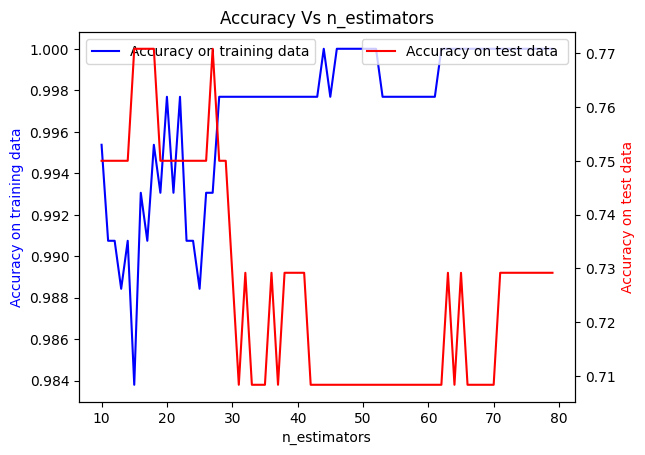

In [154]:
# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first variable
sns.lineplot(x=n, y=training_data_accuray, ax=ax1, color='blue', label='Accuracy on training data')

# Create a second y-axis
ax2 = ax1.twinx() 

# Plot the second variable on the second y-axis
sns.lineplot(x=n, y=test_data_accuray, ax=ax2, color='red', label='Accuracy on test data ')

# Customize the plot
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Accuracy on training data', color='blue')
ax2.set_ylabel('Accuracy on test data', color='red')
plt.title('Accuracy Vs n_estimators')
plt.legend()
plt.show()

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
# accuracy score on training data
X_train_prediction = gnb.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
# accuracy score on training data
X_test_prediction = gnb.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on training data :  0.8009259259259259
Accuracy on test data :  0.7708333333333334
